In [1]:
from keras.callbacks import TensorBoard, ModelCheckpoint, CSVLogger
from models import ResearchModels
from data import DataSet
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def validate(data_type, model, seq_length=40, saved_model=None,
             class_limit=None, image_shape=None):
    batch_size = 32

    # Get the data and process it.
    if image_shape is None:
        data = DataSet(
            seq_length=seq_length,
            class_limit=class_limit
        )
    else:
        data = DataSet(
            seq_length=seq_length,
            class_limit=class_limit,
            image_shape=image_shape
        )

    val_generator = data.frame_generator(batch_size, 'test', data_type)

    # Get the model.
    rm = ResearchModels(len(data.classes), model, seq_length, saved_model)

    # Evaluate!
    results = rm.model.evaluate_generator(
        generator=val_generator,
        val_samples=32)

    print(results)
    print(rm.model.metrics_names)
    
    plt.plot(results[1])
    plt.plot(results[0])
    plt.title('Accuracy v/s Loss')
    plt.ylabel('accuracy')
    plt.xlabel('loss')
    plt.show()

In [3]:
model = 'lrcn'
saved_model = 'data/checkpoints/lrcn-images.079-1.585.hdf5'

In [4]:
if model == 'conv_3d' or model == 'lrcn':
        data_type = 'images'
        image_shape = (80, 80, 3)
else:
    data_type = 'features'
    image_shape = None

Loading model data/checkpoints/lrcn-images.079-1.585.hdf5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 40, 40, 40, 32)    4736      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 40, 38, 38, 32)    9248      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 40, 19, 19, 32)    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 40, 19, 19, 64)    18496     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 40, 19, 19, 64)    36928     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 40, 9, 9, 64)      0         
_________________________________________________________________
time_distributed_7

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `evaluate_generator` call to the Keras 2 API: `evaluate_generator(generator=<data.thre..., steps=32)`


[1.5838132686913013, 0.1484375]
['loss', 'acc']


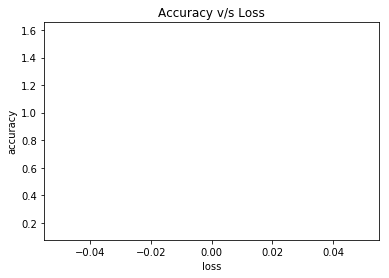

In [5]:
validate(data_type, model, saved_model=saved_model,image_shape=image_shape, class_limit=5)